# Multiclass classification problem
### Mnist - 60000 images. handwritten digits and low resolution. 28*28 pixels. We need to train a model on it.
### 10 classes so muticlass classifiation
783 inpput nodes, 128 hiddem layer neurons and 10 output nodes
The data is 60000 images with 28*28 structure

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Flatten


In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

(60000, 28, 28)


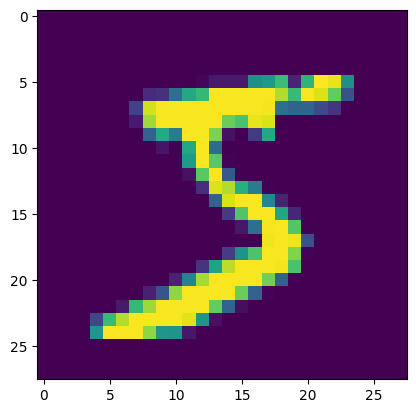

In [7]:
print(X_train.shape)
plt.imshow(X_train[0])


In [8]:
# standardize
X_train = X_train/255
X_test = X_test/255

In [9]:
model = Sequential()

# we flatten to convert 3d data to 1d.
model.add(Flatten(input_shape=(28,28)))  # since the data is 28*28 for each row. 
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'] )

In [13]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0177 - accuracy: 0.9938 - val_loss: 0.1071 - val_accuracy: 0.9755
Epoch 2/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0183 - accuracy: 0.9938 - val_loss: 0.1015 - val_accuracy: 0.9782
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0156 - accuracy: 0.9945 - val_loss: 0.1050 - val_accuracy: 0.9759
Epoch 4/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0117 - accuracy: 0.9958 - val_loss: 0.1281 - val_accuracy: 0.9748
Epoch 5/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0128 - accuracy: 0.9959 - val_loss: 0.1334 - val_accuracy: 0.9736


In [14]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

313/313 [==============================] - 1s 3ms/step


0.9765

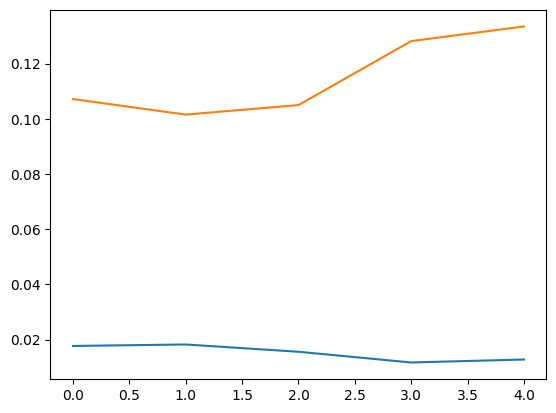

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

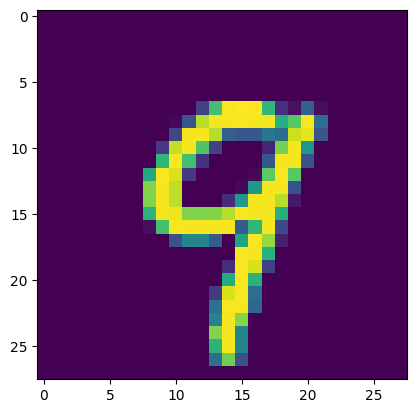

In [16]:
plt.imshow(X_test[12])

In [17]:
model.predict(X_test[12].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 114ms/step


array([9], dtype=int64)